In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
iris = pd.read_csv('../Data/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<BarContainer object of 4 artists>

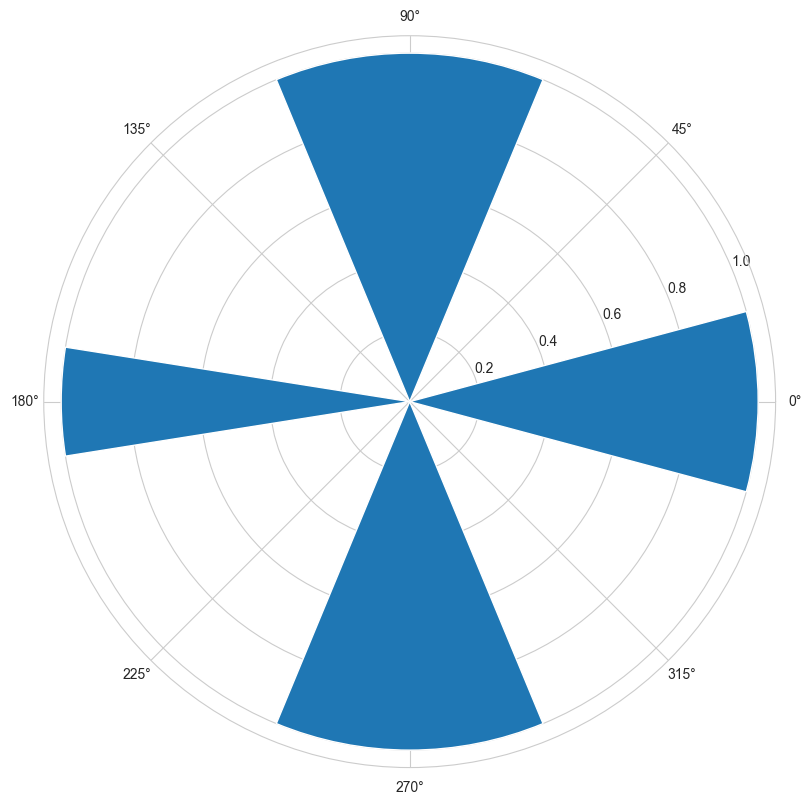

In [3]:
fig = plt.figure(figsize=(8, 8), dpi=100, layout="constrained")
ax = fig.add_subplot(1, 1, 1, projection='polar')

ax.bar(x=[0, np.pi/2, np.pi, 3 * np.pi/2],
       align='center',
       bottom=0,
       height=1,
       width=[np.pi / 6, np.pi / 4, np.pi / 10, np.pi / 4],
       )

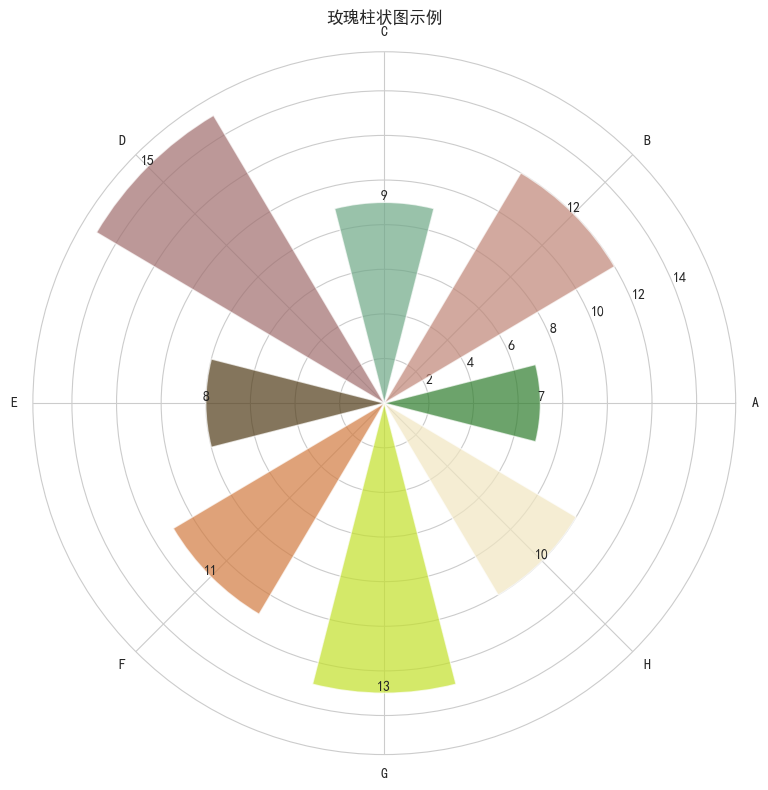

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# 设置数据
categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
values = [7, 12, 9, 15, 8, 11, 13, 10]
theta = np.linspace(0, 2*np.pi, len(categories), endpoint=False)

# 创建图形和极坐标轴
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')

# 绘制玫瑰柱状图
bars = ax.bar(theta, values, width=0.5, color=np.random.rand(len(categories),3), alpha=0.7)

# 设置极坐标轴的标签
ax.set_xticks(theta)
ax.set_xticklabels(categories)
ax.set_title('玫瑰柱状图示例', pad=20)

# 添加数值标签
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{value}',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

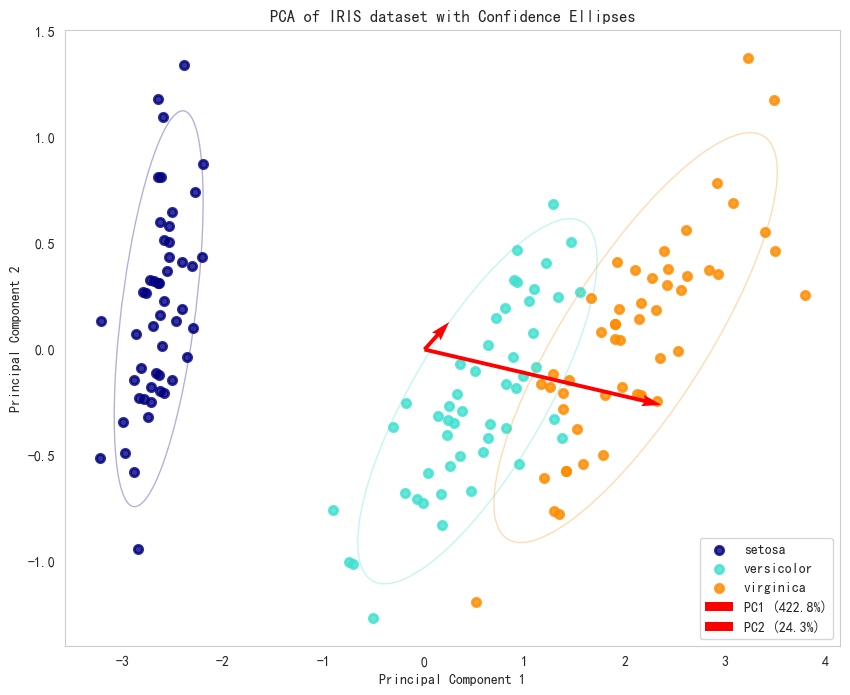

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot settings
plt.figure(figsize=(10, 8))
colors = ['navy', 'turquoise', 'darkorange']

# Function to draw confidence ellipse
def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', **kwargs):
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                     facecolor=facecolor, **kwargs)

    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Plot PCA results with confidence ellipses
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    ax = plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                     color=color, alpha=0.8, lw=2, label=target_name)
    confidence_ellipse(X_pca[y == i, 0], X_pca[y == i, 1],
                      ax=plt.gca(), edgecolor=color, alpha=0.3)

# Add principal component directions
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale by explained variance
    plt.quiver(0, 0, comp[0], comp[1],
               color='r', scale=5, width=0.005,
               label=f'PC{i+1} ({var:.1%})')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset with Confidence Ellipses')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


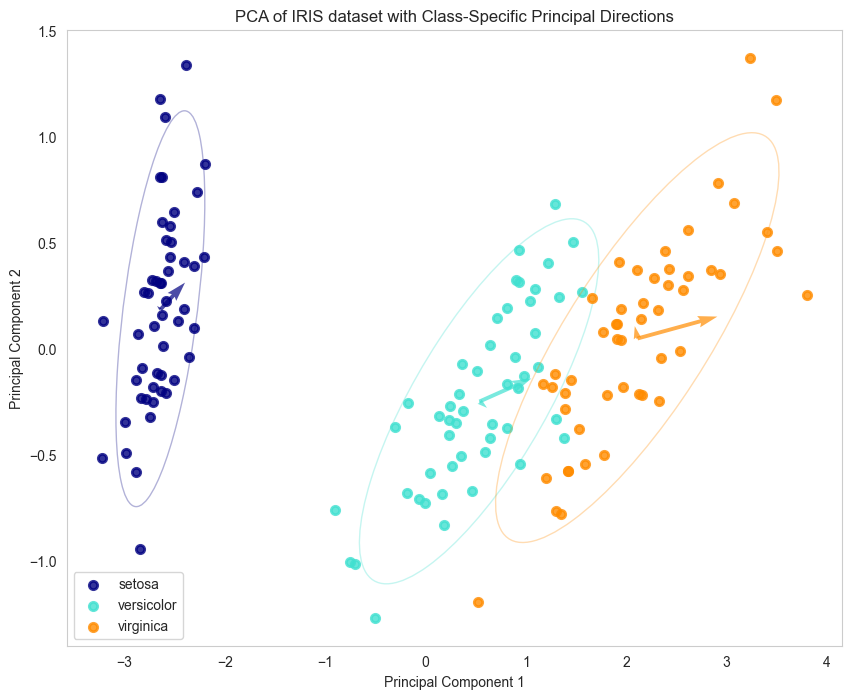

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot settings
plt.figure(figsize=(10, 8))
colors = ['navy', 'turquoise', 'darkorange']

# Function to draw confidence ellipse
def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', **kwargs):
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                     facecolor=facecolor, **kwargs)

    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Plot PCA results with confidence ellipses and class-specific PC directions
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    # Get data for current class
    class_data = X[y == i]
    class_pca = X_pca[y == i]

    # Plot points
    plt.scatter(class_pca[:, 0], class_pca[:, 1],
                color=color, alpha=0.8, lw=2, label=target_name)

    # Add confidence ellipse
    confidence_ellipse(class_pca[:, 0], class_pca[:, 1],
                      ax=plt.gca(), edgecolor=color, alpha=0.3)

    # Perform PCA just for this class to get class-specific directions
    class_pca_model = PCA(n_components=2).fit(class_data)

    # Get mean of this class in PCA space
    class_mean = np.mean(class_pca, axis=0)

    # Plot class-specific principal components
    for comp, var in zip(class_pca_model.components_, class_pca_model.explained_variance_):
        comp = comp * var  # scale by explained variance
        plt.quiver(class_mean[0], class_mean[1],
                   comp[0], comp[1],
                   color=color, scale=5, width=0.005,
                   alpha=0.7, zorder=10)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset with Class-Specific Principal Directions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


In [2]:
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [13]:
import pandas as pd
import seaborn as sns

In [9]:
X_pca = pd.DataFrame(X_pca)
X_pca

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [10]:
y = pd.Series(y)
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64

In [11]:
X_pca[3] = y
X_pca

,0,1,3
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0
...,...,...,...
145,1.944110,0.187532,2
146,1.527167,-0.375317,2
147,1.764346,0.078859,2
148,1.900942,0.116628,2


(-3.5, 4.0)

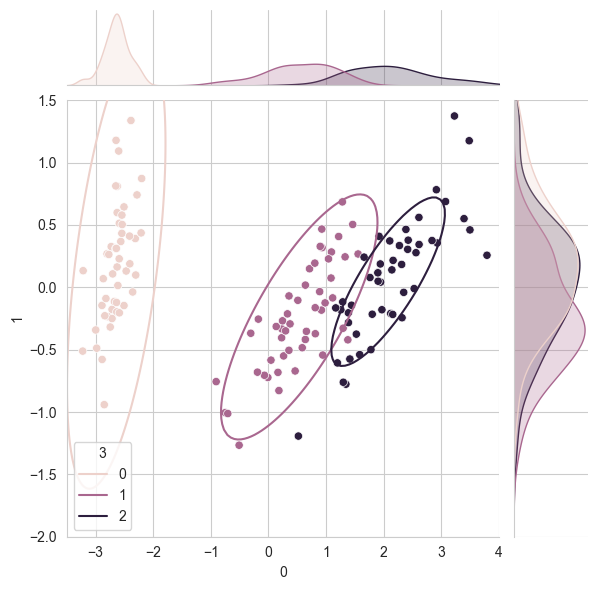

In [35]:
sns.jointplot(x=0, y=1, data=X_pca, kind="scatter", hue=3)
sns.kdeplot(x=0, y=1, data=X_pca, hue=3, levels=[0.55], bw_adjust=5)
plt.gca().set_ylim(-2, 1.5)
plt.gca().set_xlim(-3.5, 4)